In [120]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Who is Better ODI Batsman? Kohli Vs Sachin - In Depth Analysis

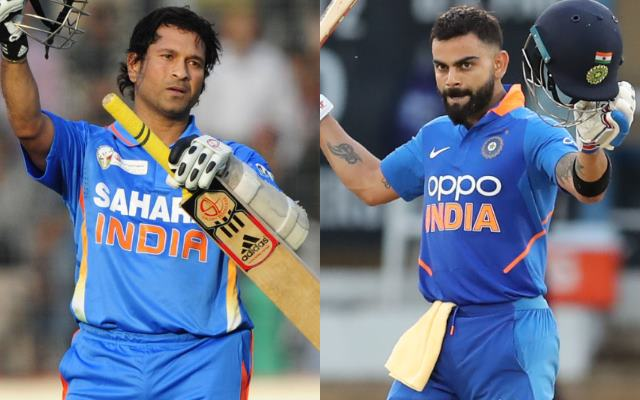

In [2]:
df = pd.read_csv(r"D:\Data Analytics Notes\Cricket Analysis\Cricket Analytics\Cricket Analytics\Day 4- Sachin vs Kohli\Material\ODI_data.csv")
                

In [3]:
df.head()  #Checking the Data heads. 

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns  # Checking the Columns in the Data.

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

In [5]:
df.shape # Checking the Count of the Rows & Columns.

(171968, 28)

In [6]:
df['Innings Runs Scored Num'].unique ()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [7]:
df = df[df['Innings Runs Scored Num'] != '-']   # Removing Values which includes '-'

In [8]:
df['Innings Runs Scored Num'].unique ()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [9]:
df = df.dropna(subset = ['Innings Runs Scored Num'])  # Droping Null Values.

In [10]:
df['Innings Runs Scored Num'].unique ()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [11]:
df['Innings Date'] = pd.to_datetime(df['Innings Date']) # Changing Data type of Date from Object to date/time.

In [12]:
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                  object
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                    float64
Innings Balls Faced                      object
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

In [13]:
df['Year'] = df['Innings Date'].dt.year

In [14]:
df.head(1)      # Adding a new Column of Year which will help us in further analysis.

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [15]:
convert_dict = {'Innings Runs Scored Num' : int, 'Innings Balls Faced' : int, 'Innings Not Out Flag' : int }
df = df.astype(convert_dict)         #Converting the requried variables(objects) to integers for further analysis.

In [16]:
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                   int32
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                      int32
Innings Balls Faced                       int32
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  


# Comparing the First 10 years Batting Career of Sachin & Kohli. 
* Sachin 1994 - 2004 & Virat 2009 - 2019

In [17]:
sachin_df = df[(df.Year >= 1994) & (df.Year <= 2004)]  #Assigning the Data between 1994 to 2004 to Sachin_df

In [18]:
virat_df =  df[(df.Year >= 2009) & (df.Year <= 2019)]   #Assigning the Data between 2009 to 2019 to virat_df

In [19]:
sachin_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [20]:
sachin_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [61]:
sachin_df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                   int32
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                      int32
Innings Balls Faced                       int32
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                    float64
100's                                   float64
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

## Comparison Metrics
* Runs Per Innings
* Strike Rate
* No. of 100's
* No. of 50's
* Team Contribution

### 1) Runs Per Innings-
* Total Runs/ Total Innings

#### Sachin' Runs Per Innings

In [22]:
sdf = sachin_df[sachin_df['Innings Player'] == 'SR Tendulkar']

In [23]:
sdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [24]:
sum(sdf['Innings Runs Scored Num']) # Total runs scored by Sachin in these Time frame.

11818

In [25]:
kdf = virat_df[virat_df['Innings Player'] == 'V Kohli']

In [26]:
kdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [27]:
sum(kdf['Innings Runs Scored Num'])  # Total runs scored by Virat in these Time frame.

11247

In [28]:
len(sdf), len(kdf) # Total Innings faced by Sachin & Virat respectively.

(271, 224)

* Sachin scored 11,818 runs in 271 Innings.
* Virat scored 11,247 runs in 224 Innings.

## Runs Per Innings (RPI) by Sachin & Virat.

In [87]:
Sachin_RPI = sum(sdf['Innings Runs Scored Num'])/len(sdf)
Sachin_RPI

43.608856088560884

In [89]:
Virat_RPI=sum(kdf['Innings Runs Scored Num'])/len(kdf)
Virat_RPI

50.20982142857143

### 2) Strike Rate-
* (Total No. of Runs scored/ Total No. of Balls Faced)*100

In [90]:
Sachin_SR =sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])*100
Sachin_SR

88.21377920429947

In [91]:
Virat_SR =sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced'])*100
Virat_SR

93.56126778138258

### 3) No. of Centuries- 
* sum(100's)

In [94]:
Sachin_C=sum(sdf["100's"])
Sachin_C

37.0

In [95]:
Virat_C=sum(kdf["100's"])
Virat_C

42.0

* 37 Centuries scored by Sachin & 42 Centuries scored by Virat.

### 4) No. of Half-Centuries-
* sum(50's)

In [97]:
Sachin_HC=sum(sdf["50's"])
Sachin_HC

57.0

In [98]:
Virat_HC=sum(kdf["50's"])
Virat_HC

53.0

* 57 Half-Centuries scored by Sachin & 53 Half-Centuries scored by Virat.

### 5) Team Contribution
* Player Runs/Total Team Runs

In [37]:
sum(sdf['Innings Runs Scored Num']),sum(kdf['Innings Runs Scored Num']) # Total No. of runs scored by Sachin & Virat.

(11818, 11247)

In [38]:
# 1994-2004, Runs scored by all players
sachin_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [102]:
sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])# Calculating total number of runs scored by Team India during the time frame between 1994 to 2004.


69715

In [101]:
Virat_Con=sum(virat_df[virat_df.Country == 'India']['Innings Runs Scored Num']) # Calculating total number of runs scored by Team India during the time frame between 2009 to 2019.
Virat_Con

63867

* Team Contribution of Sachin

In [104]:
Sachin_Con=sum(sdf['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])*100
Sachin_Con

16.951875493078962

* Team Contribution of Virat

In [105]:
Virat_Con=sum(kdf['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == 'India']['Innings Runs Scored Num'])*100
Virat_Con

17.610033350556627

## Visualizations

In [43]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10)
# Sorting out Top 10 heighest number of Runs scorers.  

Innings Player
SR Tendulkar      11818
SC Ganguly         9911
ST Jayasuriya      9297
Inzamam-ul-Haq     8561
R Dravid           7751
RT Ponting         7422
Saeed Anwar        7320
JH Kallis          7267
MS Atapattu        7253
MG Bevan           6912
Name: Innings Runs Scored Num, dtype: int32

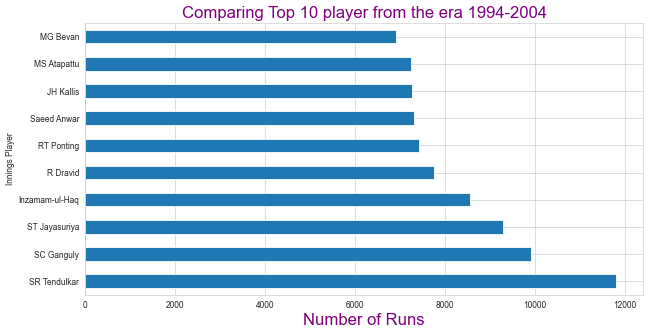

In [81]:
fig = plt.subplots(figsize=(12, 6),dpi = 60)

plt.title('Comparing Top 10 player from the era 1994-2004',size = 20,color='purple')
plt.xlabel('Number of Runs',size = 20,color='purple')
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
sns.set_style("whitegrid")
plt.show()

# Top 10 heighest number of Runs scorers (1994-2004)

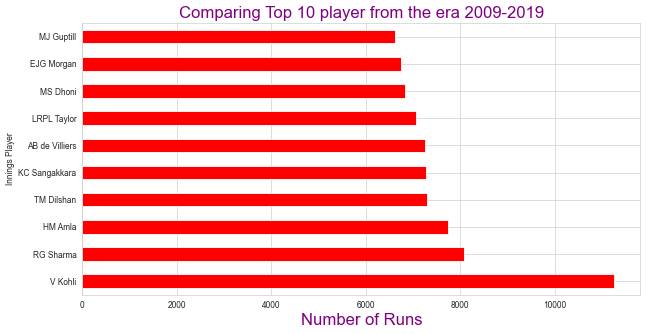

In [79]:
fig = plt.subplots(figsize=(12, 6),dpi = 60)
plt.title('Comparing Top 10 player from the era 2009-2019',size = 20,color='purple')
plt.xlabel('Number of Runs',size = 20,color='purple')
virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind ='barh',color='Red')
sns.set_style("whitegrid")
plt.show()

# Top 10 heighest number of Runs scorers (2009-2019)

In [46]:
sdf.groupby(['Year'])['Innings Runs Scored Num'].sum()

Year
1994    1089
1995     444
1996    1611
1997    1011
1998    1894
1999     843
2000    1328
2001     904
2002     741
2003    1141
2004     812
Name: Innings Runs Scored Num, dtype: int32

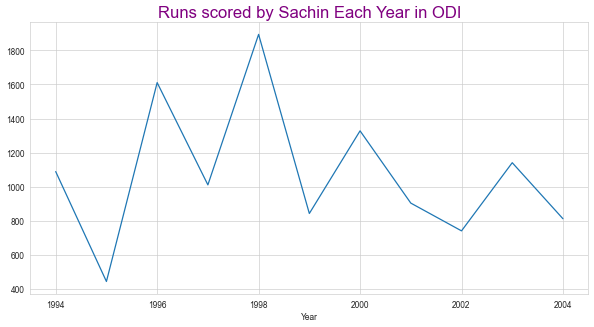

In [77]:
fig = plt.subplots(figsize=(12, 6),dpi = 60)
plt.title('Runs scored by Sachin Each Year in ODI',size = 20,color='purple')
sdf.groupby(['Year'])['Innings Runs Scored Num'].sum().plot(kind ='line')
sns.set_style("whitegrid")
plt.show()

In [53]:
kdf.groupby(['Year'])['Innings Runs Scored Num'].sum()

Year
2009     325
2010     995
2011    1381
2012    1026
2013    1268
2014    1054
2015     623
2016     739
2017    1460
2018    1202
2019    1174
Name: Innings Runs Scored Num, dtype: int32

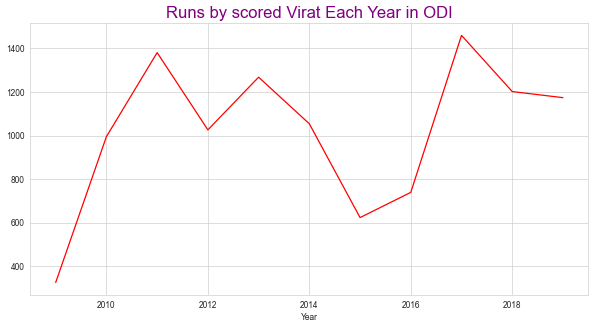

In [76]:
fig = plt.subplots(figsize=(12, 6),dpi = 60)
plt.title('Runs by scored Virat Each Year in ODI',size = 20,color='purple')
kdf.groupby(['Year'])['Innings Runs Scored Num'].sum().plot(kind = 'line',color ='Red')
sns.set_style("whitegrid")
plt.show()

# Final Conclusion


#### We will award 1 point to each player for winning in a particular parameter

In [126]:
SachinPTS = 0
ViratPTS = 0

if Sachin_RPI>Virat_RPI :
    SachinPTS = SachinPTS+1
    print('\033[94m''Sachin has better Runs per inning than Virat.')
else :
    ViratPTS = ViratPTS+1
    print('\033[94m''Virat has better Runs per inning than Sachin.')
#---------------------------------
    
if Sachin_SR>Virat_SR :
    SachinPTS = SachinPTS+1
    print('\033[94m''Sachin has better SR ratio than Virat.')
else :
    ViratPTS = ViratPTS+1
    print('\033[94m''Virat has better SR ratio than Sachin.')
    
#---------------------------------

if Sachin_C<Virat_C :
    SachinPTS = SachinPTS+1
    print('\033[94m''Sachin has scored more Centuries than Virat.')
else :
    ViratPTS = ViratPTS+1
    print('\033[94m''Virat has scored more Centuries than Sachin.')
    
#---------------------------------

if Sachin_HC<Virat_HC :
    SachinPTS = SachinPTS+1
    print('\033[94m''Sachin has scored more Half-Centuries than Virat.')
else :
    ViratPTS = ViratPTS+1
    print('\033[94m''Virat has scored more Half-Centuries than Sachin.')
    
#---------------------------------

if Sachin_Con>Virat_Con :
    SachinPTS = SachinPTS+1
    print('\033[94m''Sachin has better Team Contribution  than Virat.')
else :
    ViratPTS = ViratPTS+1
    print('\033[94m''Virat has better Team Contribution than Sachin.')
    
#---------------------------------

Virat has better Runs per inning than Sachin.
Virat has better SR ratio than Sachin.
Sachin has scored more Centuries than Virat.
Virat has scored more Half-Centuries than Sachin.
Virat has better Team Contribution than Sachin.


In [127]:
print('Sachin won in ',SachinPTS,' categories and Virat won in ',ViratPTS,' categories.')

print('---------------------------------')

if SachinPTS>ViratPTS :
    print('\033[1m''Sachin is better than Virat')
else :
    print('\033[94m','\033[1m''Virat is better than Sachin.')

Sachin won in  1  categories and Virat won in  4  categories.
---------------------------------
 Virat is better than Sachin.
